Importamos las librerias

In [1]:
import numpy as np
import xarray as xr
import skimage
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf

In [2]:
ds = xr.open_dataset('E:\Proyecto de Grado\Data\corrientes_u_v_5m_enero1993_diciembre2020.nc')

In [3]:
ds.map

<bound method Dataset.map of <xarray.Dataset>
Dimensions:    (depth: 5, latitude: 205, time: 336, longitude: 372)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 5.078
  * latitude   (latitude) float32 7.0 7.083 7.167 7.25 ... 23.83 23.92 24.0
  * time       (time) datetime64[ns] 1993-01-16T12:00:00 ... 2020-12-16T12:00:00
  * longitude  (longitude) float32 -89.92 -89.83 -89.75 ... -59.17 -59.08 -59.0
Data variables:
    vo         (time, depth, latitude, longitude) float32 ...
    uo         (time, depth, latitude, longitude) float32 ...
Attributes: (12/17)
    title:                         Monthly mean fields for product GLOBAL_REA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CME

Tomamos la latitudes y longitudes

In [4]:
lat = ds['latitude'].to_numpy()
lon = ds['longitude'].to_numpy()

Seguimos con nuestros datos de corriente

In [5]:
V = ds["vo"].mean(dim=["time", "depth"]).to_numpy()
U = ds["uo"].mean(dim=["time", "depth"]).to_numpy()

X, Y = np.meshgrid(lon, lat)

In [6]:
x = skimage.measure.block_reduce(X, (10, 10), np.nanmean)
y = skimage.measure.block_reduce(Y, (10, 10), np.nanmean)
u = skimage.measure.block_reduce(U, (10, 10), np.nanmean)
v = skimage.measure.block_reduce(V, (10, 10), np.nanmean)

c:\Users\neybe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\measure\block.py:89: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)),


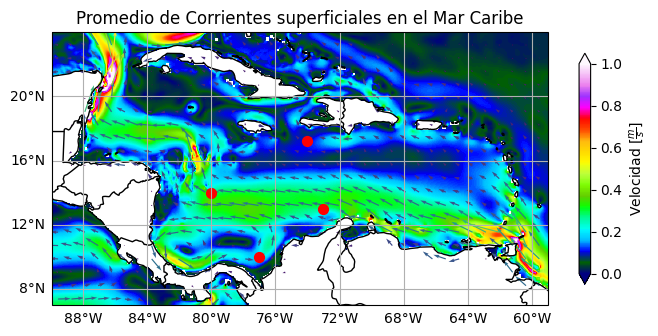

In [11]:
# Crea una figura y ejes con la proyección de latitud y longitud
fig, ax = plt.subplots(1, figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()})
loc = ticker.MultipleLocator(4)

# Agrega el mapa base (costas, límites de países, etc.)
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS)

#genera una capa raster
# Usa origin='lower' para mostrar los datos correctamente
# Usa vmin=0 y vmax=1.5 para establecer la escala de la barra de colores
R = ax.imshow(np.sqrt(U**2 + V**2), extent=[lon.min(), lon.max(), lat.min(), lat.max()],
           cmap='gist_ncar', origin='lower', vmin=0, vmax=1)

# Crea el gráfico de vectores
Q = ax.quiver(x, y, u, v, np.sqrt(u**2 + v**2), scale=10, color= 'w')

lat_p = [17.25, 13, 10, 14]

# Crea una lista con las longitudes de los puntos
lon_p = [-74, -73, -77, -80]

# Usa plt.scatter para crear un gráfico de dispersión con los puntos
plt.scatter(lon_p[0], lat_p[0], color='red', marker='o', s=50)
plt.scatter(lon_p[1], lat_p[1], color='red', marker='o', s=50)
plt.scatter(lon_p[2], lat_p[2], color='red', marker='o', s=50)
plt.scatter(lon_p[3], lat_p[3], color='red', marker='o', s=50)

# Agrega una barra de color asociada a la magnitud de los vectores
plt.colorbar(R, label=r"Velocidad [$\frac{m}{s}$]", shrink = 0.5, extend = 'both')

# Establece los límites del mapa y etiquetas de los ejes
ax.set(ylim=(lat.min(), lat.max()), xlim=(lon.min(), lon.max()))                                                                # Agrega un marco naval con las coordenadas en rojo y con líneas discontinuas
ax.gridlines(draw_labels={"bottom": "x", "left": "y"}, xlocs=loc, ylocs=loc)

# Muestra el mapa
plt.title("Promedio de Corrientes superficiales en el Mar Caribe")
plt.show()

In [ ]:
corrientes_escalares = np.sqrt(u**2 + v**2)

In [ ]:
máximo = max(corrientes_escalares, key = sum)
máximo

array([0.2528652 , 0.25480792, 0.25082454, 0.23426674, 0.20255582,
       0.15870625, 0.11779542, 0.05155913, 0.01421353, 0.05935713,
       0.07465173, 0.4297969 , 0.2394224 , 0.20855981, 0.18887776,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan, 0.        ], dtype=float32)